In [77]:
import pandas as pd
from datetime import datetime
import numpy as np

# Week 1

## Overview
As explained in during the in-class lecture, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## AI and this class

This class is *AI first*. This means that you're allowed to use LLMs to help in answering the questions. 

In fact, you could use a really good model to do most of the work for you. As I discuss during the lecture **you shouldn't always do that**. Part of the point of being here is learning how to do certain things using your human brain. To make you better at thinking. If you use the AI for everything you will get worse at thinking. 

And don't forget that the whole point of going to University in the first place is to get better at thinking. So if you just use the AI you're defeating the purpose of spending time at DTU. You'll be wasting your life.

On the other hand, there are many things that it's not important to do on your own. And how the h#ll do you tell what's what? How do you know when to use LLMs and when not to?

<div class="alert alert-block alert-info">
To be of assistance, I've designed a system of blue boxes that I use to clarify this issue. I basically tell you when LLMs are OK and when they don't! Awesome, right?
</div>

## Today

This first lecture will go over a few different topics to get you started 

* First, I'll explain a little bit about what we'll be doing this year (hint, you may want to watch _Minority Report_ if you want to prepare deeply for the class 😊).
* Second, we'll start by loading some real-world data into your very own computers and getting started with some data analysis.

## Part 1: Predictive policing. A case to learn from

For a number of years I've been a little bit obsessed with [predictive policing](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens). I guess there are various reasons. For example:

* I think it's an interesting application of data science (not necesarily a good one, see notes on "dark sides" below). 
* It connects to popular culture in a big way. Both through TV shows, such as [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) (it also features in Bones ... or any of the CSI), and also any number of movies, my favorite of which has to be [Minority report](https://www.imdb.com/title/tt0181689/).
* Predictive policing is also big business. Companies like [PredPol](https://www.predpol.com), [Palantir](https://www.theverge.com/2018/2/27/17054740/palantir-predictive-policing-tool-new-orleans-nopd), and many other companies offer their services law enforcement by analyzing crime data. 
* It hints at the dark sides of Data Science. In these algorithms, concepts like [bias, fairness, and accountability](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/) become incredibly important when the potential outcome of an algorithm is real people going to prison.  
* And, finally there's lots of data available!! Chicago, NYC, and San Francisco all have crime data available freely online.

Below is a little video to pique your interest. (Here's a [direct YouTube link](https://www.youtube.com/watch?v=YxvyeaL7NEM&t=19s) in case the embedded video give you trouble, but note that if you watch directly from YouTube, you will see ads.)

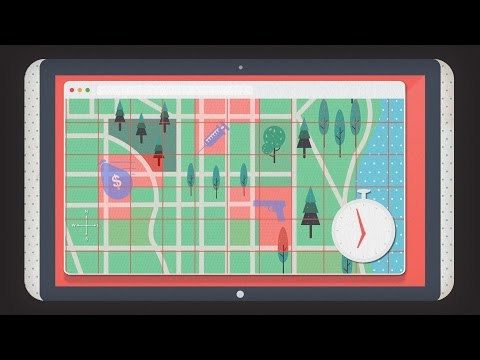

In [67]:
from IPython.display import YouTubeVideo
YouTubeVideo('YxvyeaL7NEM', width=800, height=450)

All this is to say that in the coming weeks, we'll be working to understand crime in San Francisco. We'll be using the SF crime data as a basis for our work on data analysis and data visualization. 

We will draw on data from the project [SF OpenData](https://data.sfgov.org), looking into SFPD incidents which have been recorded back since January 2003.

*Reading*

Read [this article](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens) from science magazine to get a bit deeper sense of the topic.


> *Exercise*
> 
> Answer the following questions in your own words
> 
> * According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2024? (hint, when you evaluate the evidence consider the source)
> * List and explain some of the possible issues with predictive policing according to the article.

<div class="alert alert-block alert-info">
You might feel tempted to use an LLM to answer the questions above. Don't! The goal of taking the class is to get smarter, and you won't get smarter if someone else does the work for you. So think! Read the text and write down your own thoughts. Then when you're done, you can use and LLM to make the answers better.
</div>

1) Supporters argue that, when implemented with robust safeguards, transparency, and oversight, predictive policing can be a valuable tool to enhance public safety and streamline resource allocation.
Critics contend that without careful attention to the underlying data and potential biases, it risks reinforcing existing inequalities and may contribute to systemic injustices in law enforcement.
2) 
- Bias in Data: Historical crime data may reflect existing biases, such as over-policing in minority or economically disadvantaged neighborhoods. If these biases are built into the algorithms, the system can perpetuate or even exacerbate these inequalities.
- Privacy and Civil Liberties: The collection and analysis of data raise concerns about surveillance and the potential infringement of individual privacy rights.
- Accountability and Transparency: There are often questions about how the algorithms work and whether they can be held accountable if they lead to unjust outcomes.
- Over-Reliance on Technology: An over-reliance on predictive models might lead to neglecting community policing and other human-centric approaches that are crucial in building trust within communities.

# Part 2: Load some crime-data into your Jupyter notebook

The data we will be working with is perfect for `pandas`, so a good approach is to go to [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2025/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't and figure out how to load data into `pandas' means. 

But this course is not about programming orthdoxy, so if you don't like `pandas`, you're free to use other solutions. There are many other ways to load data into Python, e.g. using dictionaries.

> *Exercise*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * You will notice that the SF crime data is divided into two periods. One from 2003 to May 2018 and one which is all of 2018 to the present. **I would like you to get both datafiles and combine them**. Only use complete years, so the dataset should start Jan 1st and end Dec 31st.
>    * **Hint 1**: Combining these two datasets is one of the hardest things you'll need to do today, so I recommend you save this merger to the end of the lecture. Instead, just work with the 2003-2018 dataset and get the plots going. Then once you've roughly sorted out all the plots, etc, come back and and get the full dataset going.
>    * **Hint 2**: You're going to want to drop a lot of the columns. Make sure you keep at least information related to crime type (category/incident-category), time, and location (both GPS and district names will be useful).
>    * **Hint 3**: For crime types, the upper/lower case conventions are not consistent across the files, and you might need to match categories with slightly different names across the two datasets. For example there are 37 crime categories in the oldest dataset and 49 in the second dataset, so the merger is not trivial to make. Use your own judgment and  **support from an LLM** to decide how to merge.
> * You are allowed to use and LLM to help you combine the files and clean the data. I recommend parsing the files and getting rid of fields you don't think you'll need in the future.
> * To get your cleaned file into `pandas`, you can use the tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/). If you want to try your luck without `pandas`, you can use the `csv` package to load the file.
> * Now generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

<div class="alert alert-block alert-info">
As noted above, you're allowed to use LLMs as much as you like for this exercise.
</div>

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

In [ ]:
# Define the file paths
file1_path = "c:/Users/IZO21/Desktop/Police_Department_Incident_Reports__2018_to_Present_20250223.csv"
file2_path = "C:/Users/IZO21/Desktop/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250223.csv"

# Read the CSV files into pandas DataFrames
dfNew = pd.read_csv(file1_path)
dfOld = pd.read_csv(file2_path)

# Display the first few rows of each DataFrame
print("Data from file1.csv:")
display(dfNew.head())

print("\nData from file2.csv:")
display(dfOld.head())

Data from file1.csv:


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/02/15 03:00:00 AM,2023/02/15,03:00,2023,Wednesday,2023/03/11 04:55:00 PM,125378606372,1253786,236046123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/13 11:26:00 AM,2023/03/13,11:26,2023,Monday,2023/03/13 01:37:00 PM,125419506244,1254195,236046850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data from file2.csv:


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [69]:
# Convert the 'Date' column using the correct format
dfOld['Date'] = pd.to_datetime(dfOld['Date'], format='%m/%d/%Y')

# Convert the 'Time' column using the format that matches your data
dfOld['Time'] = pd.to_datetime(dfOld['Time'], format='%H:%M').dt.time

# Combine the Date and Time columns into one datetime column
dfOld['Incident Datetime'] = dfOld.apply(lambda row: datetime.combine(row['Date'], row['Time']), axis=1)

# Optionally, rename columns if needed
dfOld.rename(columns={'IncidntNum': 'Incident Number',
                      'Category': 'Incident Category',
                      'PdDistrict':'Police District',
                      'X':'Longitude',
                      'Y':'Latitude',}, inplace=True)


In [70]:
columns = ['Incident Datetime','Incident Number',
            'Incident Category','Police District',
            'Latitude','Longitude',]

dfOld = dfOld[columns]
dfNew = dfNew[columns]

In [71]:
def filter_complete_years(df, date_col='Incident Datetime'):
    df[date_col] = pd.to_datetime(df[date_col])
    
    complete_years = []
    # Group by year using the datetime column
    for year, group in df.groupby(df[date_col].dt.year):
        min_date = group[date_col].min().date()
        max_date = group[date_col].max().date()
        if min_date.month == 1 and min_date.day == 1 and max_date.month == 12 and max_date.day == 31:
            complete_years.append(year)
    
    # Filter DataFrame to only include rows from complete years
    filtered_df = df[df[date_col].dt.year.isin(complete_years)]
    
    return filtered_df, complete_years

In [72]:
dfNew, complete_years = filter_complete_years(dfNew, date_col='Incident Datetime')
print("Complete years:", complete_years)
dfOld, complete_years = filter_complete_years(dfOld, date_col='Incident Datetime')
print("Complete years:", complete_years)

Complete years: [2018, 2019, 2020, 2021, 2022, 2023, 2024]
Complete years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [74]:
# Unique categories in dfOld
unique_categories_old = dfOld['Incident Category'].unique()
print("Unique categories in dfOld:", unique_categories_old)

# Unique categories in dfNew
unique_categories_new = dfNew['Incident Category'].unique()
print("Unique categories in dfNew:", unique_categories_new)

Unique categories in dfOld: ['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']
Unique categories in dfNew: ['Larceny Theft' 'Recovered Vehicle' 'Lost Property' 'Drug Violation'
 'Assault' 'Malicious Mischief' 'Non-Criminal' 'Fraud' 'Warrant'
 'Other Offenses' 'Robbery' 'Case Closure' 'Stolen Property'
 'Other Miscellaneous' 'Other' 'Traffic Collision' 'Suspicious Occ'
 'Disorderly Conduct' 'Weapons Carrying Etc' 'Rape' 'Drug Offense'
 'Missing Person' 'Motor Vehicle The

In [76]:
# --- Step 1: Lowercase the category columns ---
dfOld['Incident Category'] = dfOld['Incident Category'].str.lower()
dfNew['Incident Category'] = dfNew['Incident Category'].str.lower()

# --- Step 2: Define a mapping dictionary for dfNew ---
# Note: Categories that don't have a match in dfOld are set to np.nan to flag for later handling.
mapping_dfNew_to_dfOld = {
    'larceny theft': 'larceny/theft',         # Map to dfOld's naming convention
    'motor vehicle theft': 'vehicle theft',
    'motor vehicle theft?': 'vehicle theft',
    'lost property': 'stolen property',
    'drug violation': 'drug/narcotic',
    'drug offense': 'drug/narcotic',
    'malicious mischief': 'vandalism',
    'warrant': 'warrants',
    'other offenses': 'other offenses',       # Likely already matches, but included for clarity
    'other miscellaneous': 'other offenses',
    'other': 'other offenses',
    'suspicious occ': 'suspicious occ',
    'weapons carrying etc': 'weapon laws',
    'rape': 'sex offenses, forcible',
    'forgery and counterfeiting': 'forgery/counterfeiting',
    'miscellaneous investigation': 'other offenses',
    'sex offense': 'sex offenses, non forcible',
    'weapons offense': 'weapon laws',
    'vehicle misplaced': 'vehicle theft',
    'suspicious': 'suspicious occ',
    'vehicle impounded': 'recovered vehicle',
    'human trafficking, commercial sex acts': 'sex offenses, non forcible',
    'human trafficking (a), commercial sex acts': 'sex offenses, non forcible',
    'human trafficking (b), involuntary servitude': 'sex offenses, non forcible',
    # The following categories are not found in dfOld.
    'civil sidewalks': np.nan,  
    'traffic collision': np.nan,  
    'case closure': np.nan,
    'courtesy report': np.nan,
    'offences against the family and children': np.nan,
    'traffic violation arrest': np.nan
}

# --- Step 3: Apply the mapping to dfNew ---
dfNew['Incident Category'] = dfNew['Incident Category'].replace(mapping_dfNew_to_dfOld)

# Optionally, if you want to ensure consistency in dfOld too, you might define a mapping for dfOld.
# For this example, we assume dfOld's categories are already in the desired form.

# --- Step 4: Extract and print unique categories ---
unique_old = sorted(dfOld['Incident Category'].dropna().unique())
unique_new = sorted(dfNew['Incident Category'].dropna().unique())

print("Unique categories in dfOld:", unique_old)
print("Unique categories in dfNew (after mapping):", unique_new)

# --- Step 5: Combine the datasets ---
df_combined = pd.concat([dfOld, dfNew], ignore_index=True)

# Optional: If you want to drop rows with unmapped/unknown categories, you could do so:
# df_combined = df_combined.dropna(subset=['category'])

print("\nCombined DataFrame shape:", df_combined.shape)

Unique categories in dfOld: ['arson', 'assault', 'bad checks', 'bribery', 'burglary', 'disorderly conduct', 'driving under the influence', 'drug/narcotic', 'drunkenness', 'embezzlement', 'extortion', 'forgery/counterfeiting', 'fraud', 'gambling', 'kidnapping', 'larceny/theft', 'liquor laws', 'loitering', 'missing person', 'non-criminal', 'other offenses', 'pornography/obscene mat', 'prostitution', 'recovered vehicle', 'robbery', 'secondary codes', 'sex offenses, forcible', 'sex offenses, non forcible', 'stolen property', 'suicide', 'suspicious occ', 'trea', 'trespass', 'vandalism', 'vehicle theft', 'warrants', 'weapon laws']
Unique categories in dfNew (after mapping): ['arson', 'assault', 'burglary', 'disorderly conduct', 'drug/narcotic', 'embezzlement', 'fire report', 'forgery/counterfeiting', 'fraud', 'gambling', 'homicide', 'larceny/theft', 'liquor laws', 'missing person', 'non-criminal', 'other offenses', 'prostitution', 'recovered vehicle', 'robbery', 'sex offenses, forcible', 'se

In [78]:
df_combined['Police District'] = df_combined['Police District'].str.lower()
unique_pd = sorted(df_combined['Police District'].dropna().unique())
print("Unique police districs in df_combined:", unique_pd)

Unique police districs in df_combined: ['bayview', 'central', 'ingleside', 'mission', 'northern', 'out of sf', 'park', 'richmond', 'southern', 'taraval', 'tenderloin']


In [80]:
df_combined.columns
# Total number of crimes
total_crimes = df_combined.shape[0]
print("Total number of crimes:", total_crimes)

# Unique crime categories and how many there are
unique_categories = df_combined['Incident Category'].unique()
print("Unique crime categories ({}):".format(len(unique_categories)))
print(unique_categories)

# Number of crimes in each category
crime_counts = df_combined['Incident Category'].value_counts()
print("\nNumber of crimes in each category:")
print(crime_counts)

Total number of crimes: 3005979
Unique crime categories (41):
['robbery' 'vehicle theft' 'arson' 'assault' 'trespass' 'burglary'
 'larceny/theft' 'warrants' 'other offenses' 'drug/narcotic'
 'suspicious occ' 'liquor laws' 'vandalism' 'weapon laws' 'non-criminal'
 'missing person' 'fraud' 'sex offenses, forcible' 'secondary codes'
 'disorderly conduct' 'recovered vehicle' 'kidnapping'
 'forgery/counterfeiting' 'prostitution' 'drunkenness' 'bad checks'
 'driving under the influence' 'loitering' 'stolen property' 'suicide'
 'bribery' 'extortion' 'embezzlement' 'gambling' 'pornography/obscene mat'
 'sex offenses, non forcible' 'trea' nan 'fire report' 'homicide'
 'weapons offence']

Number of crimes in each category:
Incident Category
larceny/theft                  736774
other offenses                 385616
non-criminal                   285127
assault                        220671
vandalism                      176255
vehicle theft                  175901
drug/narcotic                  

> *Exercise 2 The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Did you run into categories changing across your two data periods? If yes, think about how to deal with those issues. There's no right answer but reflect on your decisions. (And don't spend too much energy on this, since we'll only be working on a subset of the crimes long-term, see *Focus Crimes* below.)
> * Create a bar-plot over crime occurrences. This is a data visualization class, so here is the first essential lesson: **For a plot to be informative you need to label the axes** (The police chief will be furious if you forget). It can also be nice to other relevant pieces of info, title, labels, etc.). I created one for the 2003-2018 dataset that's displayed below (so yours doesn't have to look exactly like mine - the important thing is that you clearly communicate the information in the dataset).
> 
> <div>
> <img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
> </div>

<div class="alert alert-block alert-info">
As above, you're allowed to use LLMs as much as you like for this exercise.
</div>

Exercise 2
- the most commonly occuring category is larceny/theft
- the least is trea

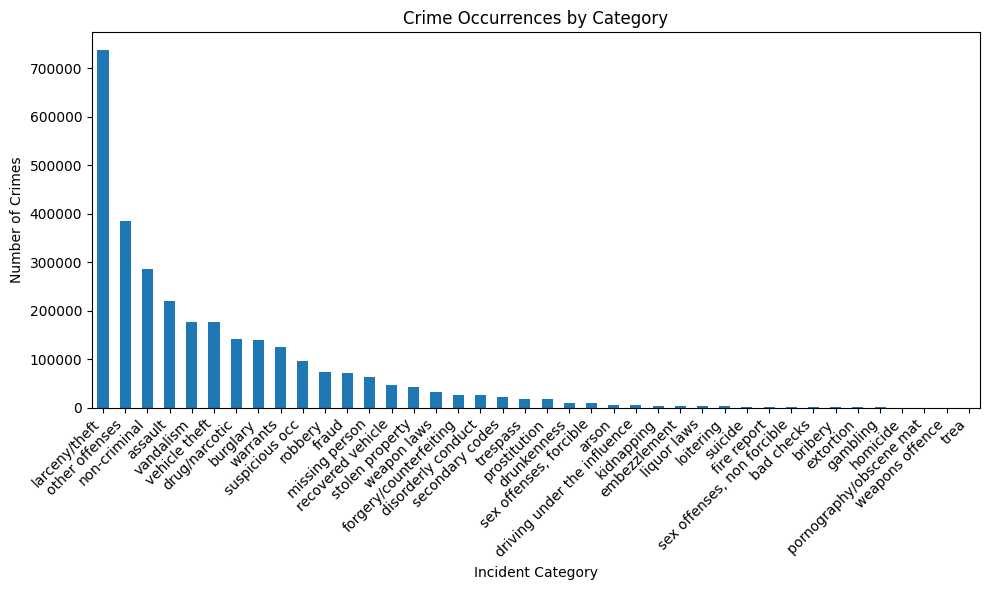

In [81]:
import matplotlib.pyplot as plt

# Count the number of crimes in each category
crime_counts = df_combined['Incident Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Crime Occurrences by Category')
plt.xlabel('Incident Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for readability
plt.show()


The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with the fewest crimes?.
> * Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
> * Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

In [16]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

My plots look like this for the 10 focus crimes:

  ![Barplots](https://raw.githubusercontent.com/suneman/socialdata2025/main/files/CrimesYearCategory.png)
    
Note that names of each plot explain what you're looking at. And that when you have many subplots it's OK that you don't label every single axis. You may simply put axes on the bottom / side that are common for all plots.) 

**What I want you to notice is that by "drilling into" the data, exploring by category patterns begin to emerge**. The overall crime-counts don't tell us much, but as we interrogate the data, we start to learn about what's going on. We will continue this exploration next week.

> *Exercise 3 (continued)*
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html).

<div class="alert alert-block alert-info">
As in the other exercises, you're allowed to use LLMs as much as you like for creating the plots. But do use your own brain for commenting on the trends in the plots.
</div>

You've made it! You have successfully completed Lecture 1. If you didn't get enough, try to **personalize** your plots. We have already added titles, labels, etc., however, the look of default plots are quite boring.

Year with most crimes: 2018 ( 151581 crimes )
Year with fewest crimes: 2024 ( 108595 crimes )


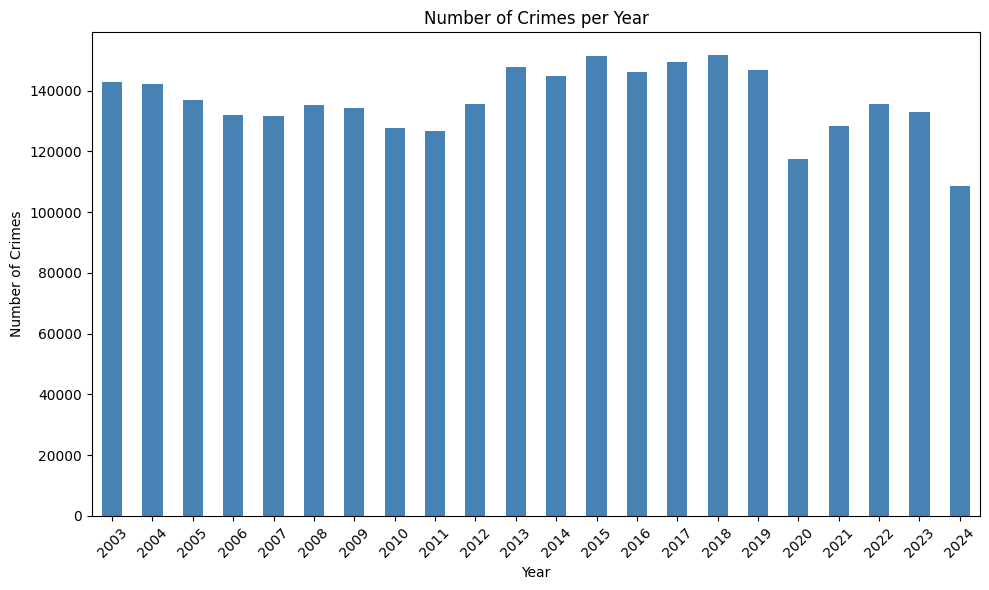

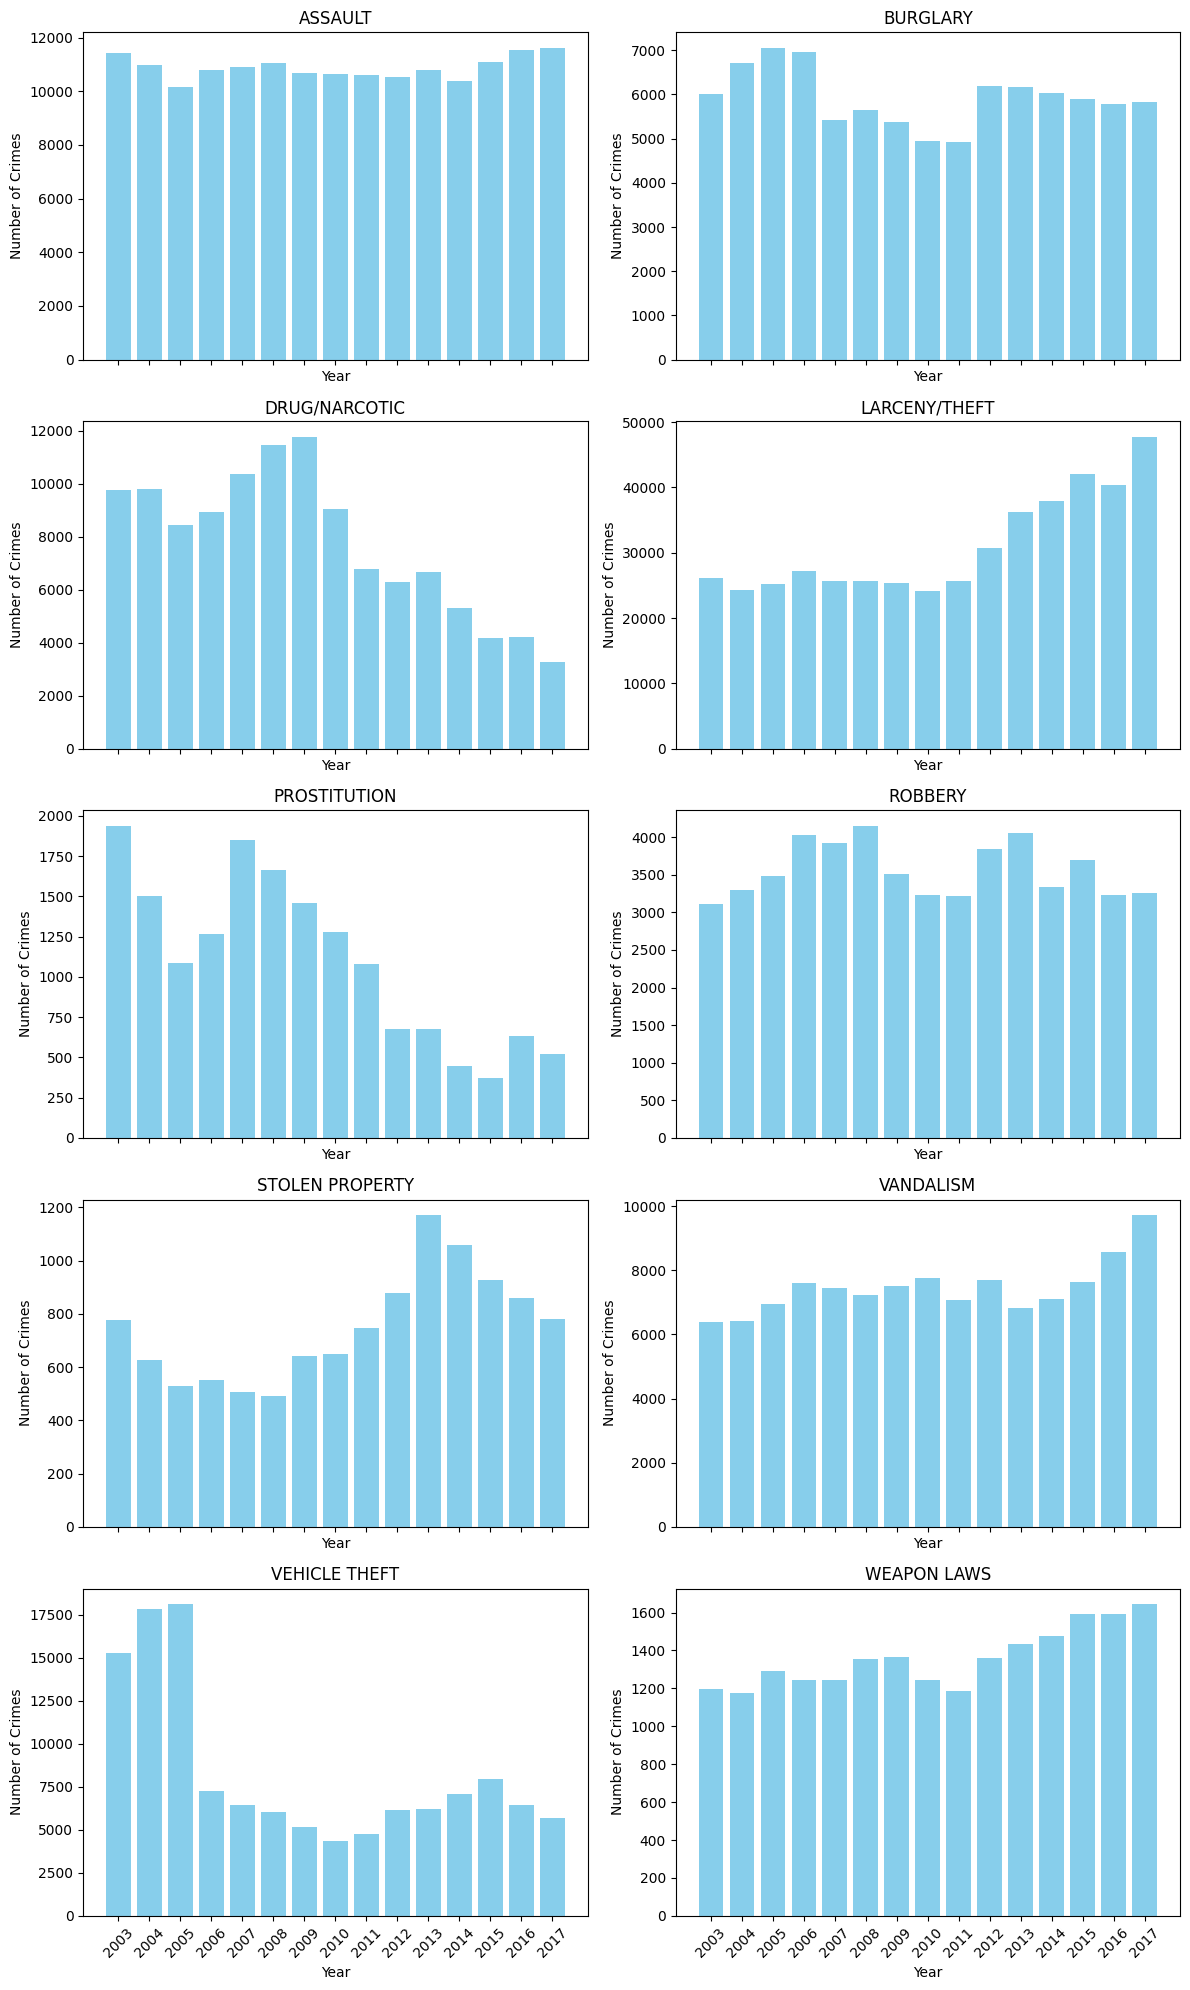

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# --- Step 1: Extract the Year from Incident Datetime ---
df_combined['Year'] = df_combined['Incident Datetime'].dt.year

# --- Step 2: Count Crimes per Year ---
crimes_per_year = df_combined.groupby('Year').size()

# Report the year with the most and fewest crimes
year_most = crimes_per_year.idxmax()
year_fewest = crimes_per_year.idxmin()
print("Year with most crimes:", year_most, "(", crimes_per_year.max(), "crimes )")
print("Year with fewest crimes:", year_fewest, "(", crimes_per_year.min(), "crimes )")

# --- Step 3: Bar Plot of Crimes per Year ---
plt.figure(figsize=(10, 6))
crimes_per_year.plot(kind='bar', color='steelblue')
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 4: Focus Crimes Analysis ---
# Define focus crimes (provided in uppercase)
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

# Limit analysis to years 2003-2017
df_old_period = df_combined[df_combined['Year'].between(2003, 2017)].copy()

# Ensure the Incident Category is uppercase for matching
df_old_period['Incident Category'] = df_old_period['Incident Category'].str.upper()

# Prepare subplots – here we create a grid with 2 columns
n_focus = len(focuscrimes)
ncols = 2
nrows = math.ceil(n_focus / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex=True)
axs = axs.flatten()

# For each focus crime, plot the number of crimes per year
for i, crime in enumerate(sorted(focuscrimes)):
    # Filter rows corresponding to the current focus crime
    crime_data = df_old_period[df_old_period['Incident Category'] == crime]
    
    # Count crimes by year
    crime_counts = crime_data.groupby('Year').size()
    
    # Create a bar chart for the focus crime
    axs[i].bar(crime_counts.index, crime_counts.values, color='skyblue')
    axs[i].set_title(crime)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Number of Crimes")
    axs[i].set_xticks(range(2003, 2018))
    axs[i].set_xticklabels(range(2003, 2018), rotation=45)

# Remove any extra subplots if the grid has more axes than needed
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
